In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
datasets = pd.read_csv('Bandas-metricas.csv')

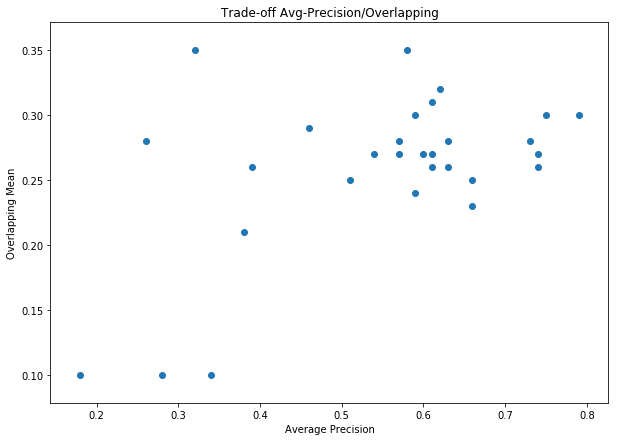

In [8]:
plt.figure(figsize=(10,7))
plt.title('Trade-off Avg-Precision/Overlapping')
x = datasets['average precision'].values
y = datasets['overlapping mean'].values
plt.xlabel('Average Precision')
plt.ylabel('Overlapping Mean')
plt.scatter(x,y)
plt.savefig('presicion-over')
plt.show()

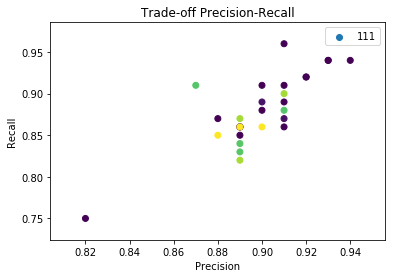

In [141]:
plt.title('Trade-off Precision-Recall')
x = datasets['Precision'].values
y = datasets['Recall'].values

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.scatter(x,y, c=datasets.Bandas.values)
plt.legend(datasets.Bandas.values)
plt.show()

In [10]:
datasets.corr()

,Bandas,C,Precision,Recall,overlapping mean,average precision
Bandas,1.000000,-0.191891,-0.233494,-0.307546,0.281674,-0.167982
C,-0.191891,1.000000,0.210214,0.369047,0.002933,-0.007546
Precision,-0.233494,0.210214,1.000000,0.801241,0.249127,0.193372
Recall,-0.307546,0.369047,0.801241,1.000000,0.296459,0.170046
overlapping mean,0.281674,0.002933,0.249127,0.296459,1.000000,0.525770
average precision,-0.167982,-0.007546,0.193372,0.170046,0.525770,1.000000


# Graficar Detecciones

In [22]:
from PIL import Image
from PIL import ImageDraw
import cv2
import numpy as np
import scipy.io as sio
from sklearn.externals import joblib
from sklearn.preprocessing import normalize

In [23]:
imagen = Image.open("../imagenes/Evaluacion-exp/img_muestra.tif")
modelo = joblib.load("HNM-9711.sav")
#datos de test
datos = 'TCOLOR_npp_d20170717_t1724069_e1729455_b00001_c20170717215509558621_cgss_ops_20170828161438.mat'

/home/ezapata/.virtualenvs/tesis-informe/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator SVC from version 0.18.1 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [3]:
def read_matlab_file(file_matlab):
    """Return metadata from image."""
    dicc =sio.loadmat(file_matlab)
    proposal = dicc["coord"]
    label = dicc["value"]
    fvector = dicc["vectorf"]
    return np.squeeze(label) ,proposal, fvector

In [5]:
label, bboxs, features = read_matlab_file(datos)

In [7]:
features = normalize(features)
inference = modelo.predict(features)

In [25]:
img = imagen.copy()
img = np.array(img)
for i, (x,y,w,h) in enumerate(bboxs[np.where(inference==1)]):
    print('Region {}, coordenadas{}'.format(i,(x,y,w,h)))
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),5)
# guardar resultados
cv2.imwrite('../imagenes/Evaluacion-exp/prediction-9711.png', cv2.cvtColor(img, cv2.B) img)

Region 0, coordenadas(889, 2881, 127, 127)
Region 1, coordenadas(889, 2881, 285, 127)
Region 2, coordenadas(630, 2881, 441, 127)
Region 3, coordenadas(870, 2756, 196, 124)
Region 4, coordenadas(986, 1217, 262, 105)
Region 5, coordenadas(1092, 1217, 219, 99)
Region 6, coordenadas(1126, 1153, 132, 127)
Region 7, coordenadas(1022, 1153, 226, 127)


TypeError: img is not a numpy array, neither a scalar